In [70]:
import numpy as np

from matplotlib import pyplot as plt
import cv2 as cv
from mpl_toolkits import mplot3d

In [71]:
# Affichage de notre image
def affiche_image(img):
    plt.figure()
    plt.imshow(img,cmap="gray")
    plt.colorbar()

In [72]:
# Fonction qui permet de calculer la transformée de Fourier d'une image
def  atom(n,m,fx,fy):
    img=np.zeros((n, m))
    x = np.array(np.arange(0,m))
    y = np.arange(0,n)
    e1 = np.exp(1j*2*np.pi*fx*x)
    e2 = np.exp(1j*2*np.pi*fy*y)
    for i in range(n):
        for j in range(m):
            img[i,j] = np.real(e2[i]*np.conjugate(e1[j]))
    return img

In [73]:
def fourier2d(img,fe):
    [height, width] = img.shape

    f = np.abs(np.fft.fftshift(np.fft.fft2(img)))
    n = width/2
    m = height/2

    plt.figure()
    ax = plt.axes(projection='3d')
    x = np.arange(-n/height, n/height, float(fe/height))
    y = np.arange(-m/width,m/width, float(fe/width))
    X, Y = np.meshgrid(x, y)
    print(X.shape)
    ax.plot_surface(X, Y, np.sqrt(f))
    plt.title("Spectre - 1")
    plt.xlabel("Fx")
    plt.ylabel("Fy")

    plt.figure()
    plt.imshow(np.log(5*f+1),extent=[-n/height, n/height, -m/width,m/width])
    plt.colorbar()
    plt.xlabel("Fx")
    plt.ylabel("Fy")
    plt.title("Spectre - 2")

(128, 128)


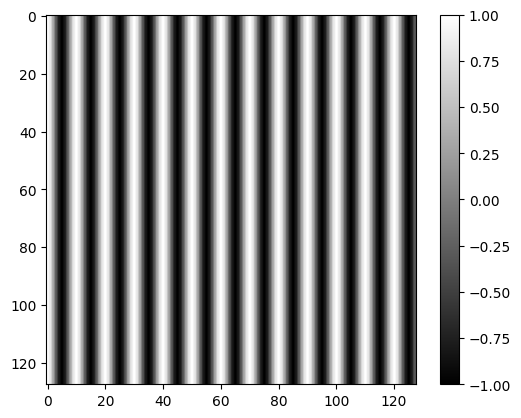

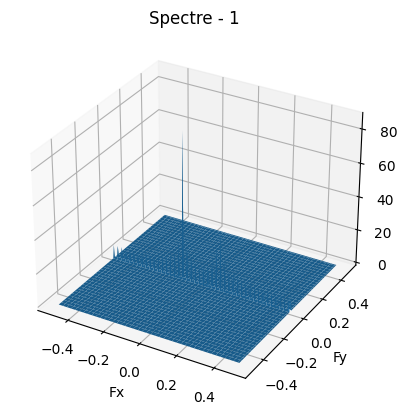

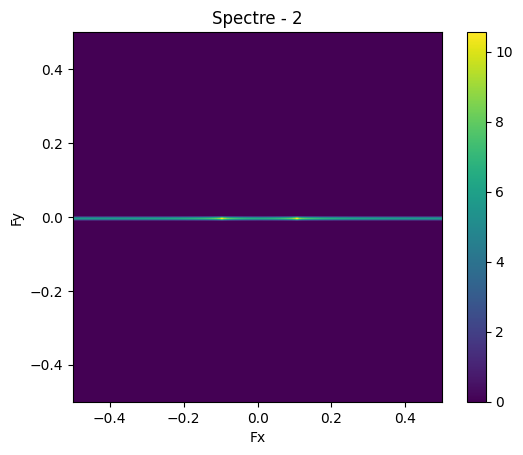

In [74]:
# Création de notre image
imgAtom = atom(128,128,0.1,0)
affiche_image(imgAtom)

# Calcul de la transformée de Fourier de notre image
fourier2d(imgAtom, 1)

(128, 128)
(128, 128)
(128, 128)


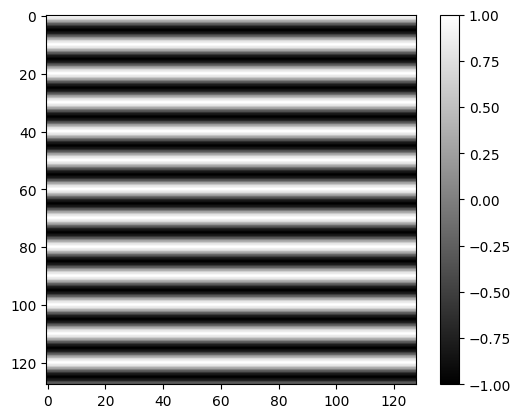

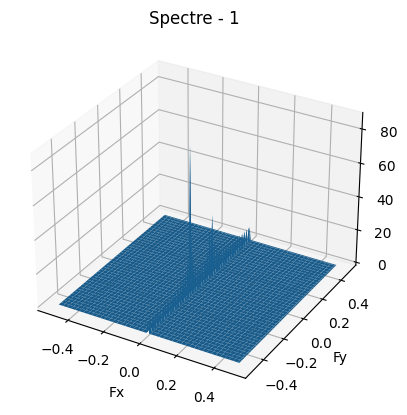

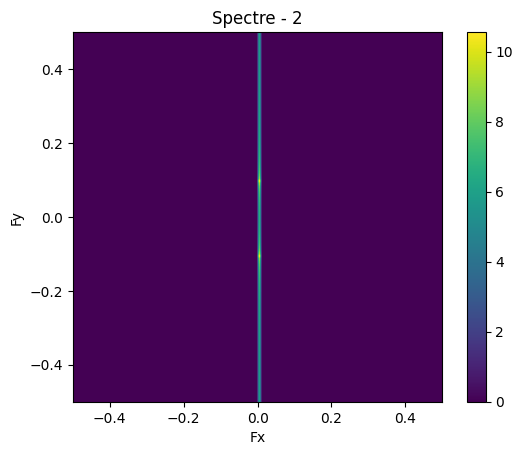

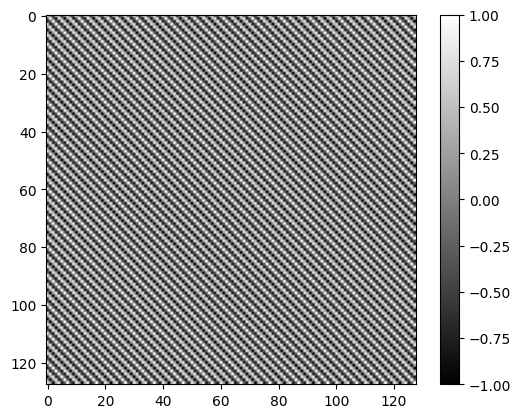

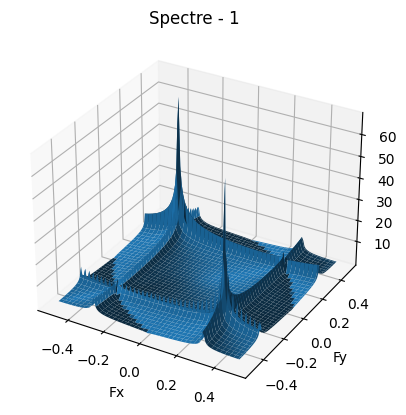

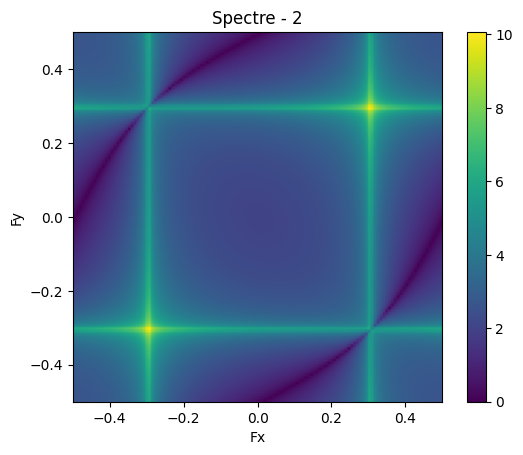

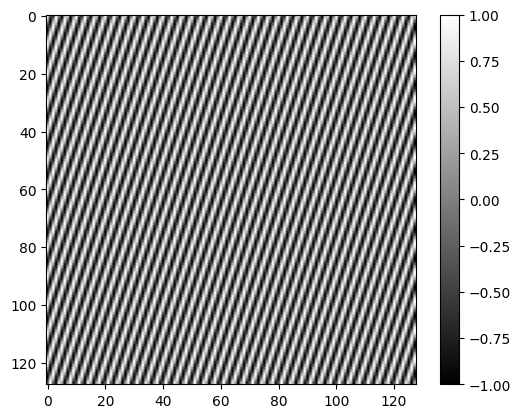

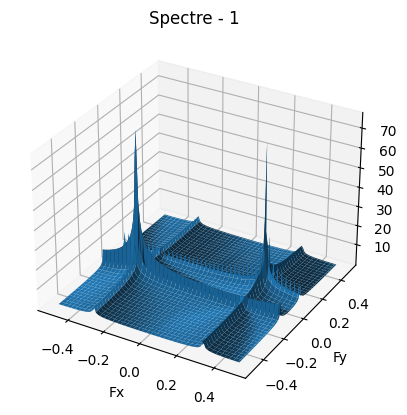

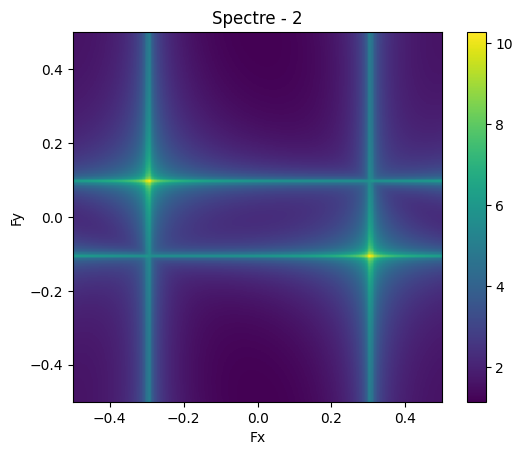

In [75]:
imgAtom2 = atom(128,128,0,0.1)
affiche_image(imgAtom2)

fourier2d(imgAtom2, 1)

imgAtom3 = atom(128,128,0.3,0.3)
affiche_image(imgAtom3)

fourier2d(imgAtom3, 1)

imgAtom4 = atom(128,128,-0.3,0.1)
affiche_image(imgAtom4)

fourier2d(imgAtom4, 1)

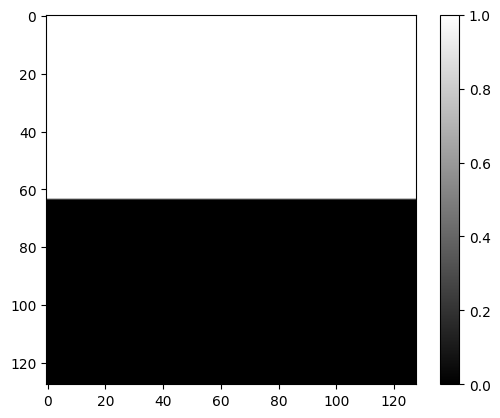

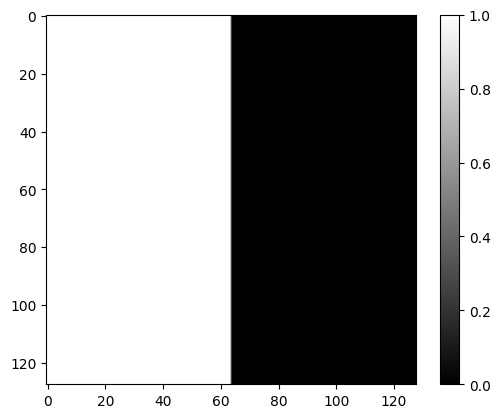

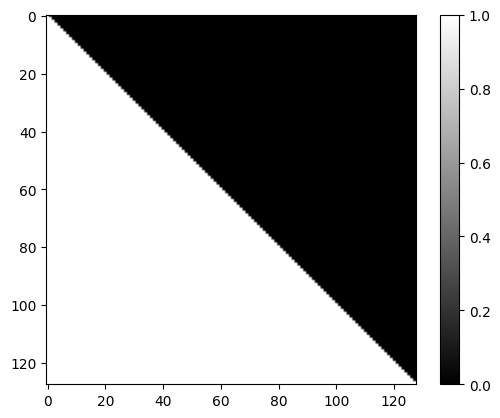

In [76]:
N, M = 128, 128

rupt0 = np.zeros((N, M))
rupt0[:N//2,:] = 1

rupt1 = np.zeros((N, M))
rupt1[:,:M//2] = 1

rupt2 = np.tril(np.ones((N,M)))

affiche_image(rupt0)
affiche_image(rupt1)
affiche_image(rupt2)


(128, 128)
(128, 128)
(128, 128)


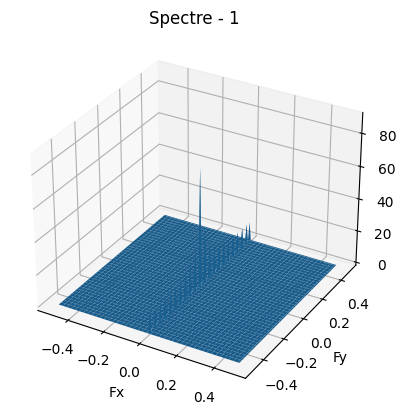

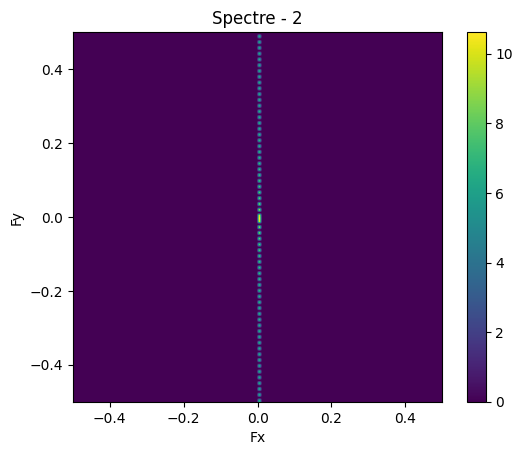

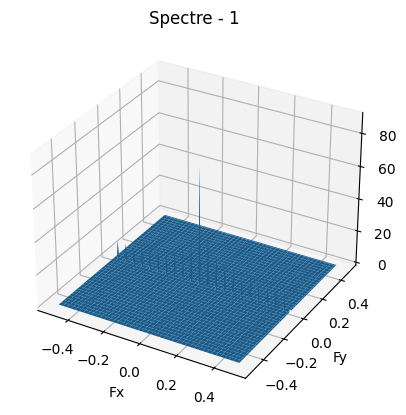

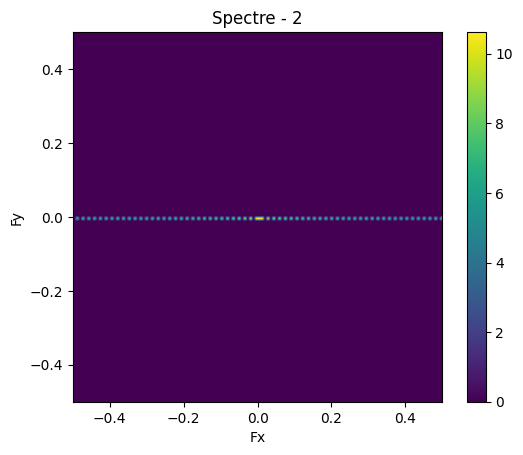

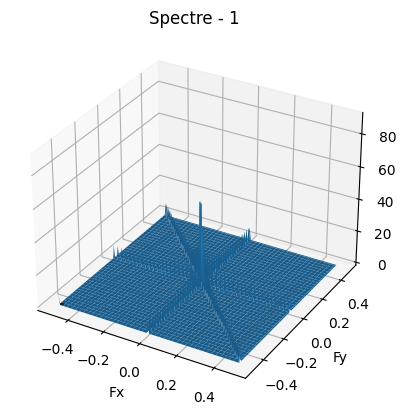

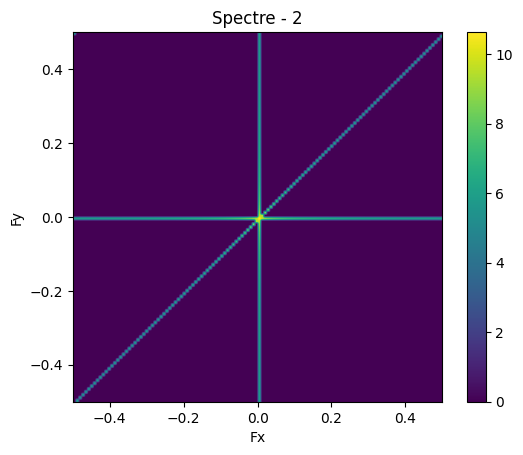

In [77]:
fourier2d(rupt0, 1)
fourier2d(rupt1, 1)
fourier2d(rupt2, 1)

(128, 128)


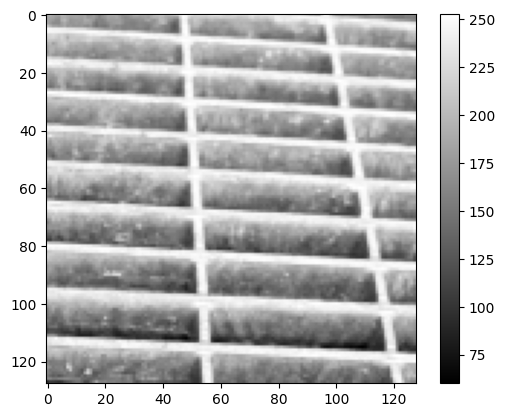

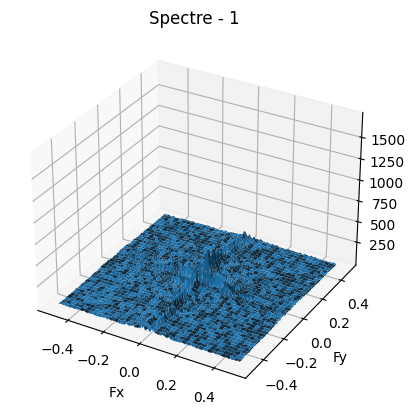

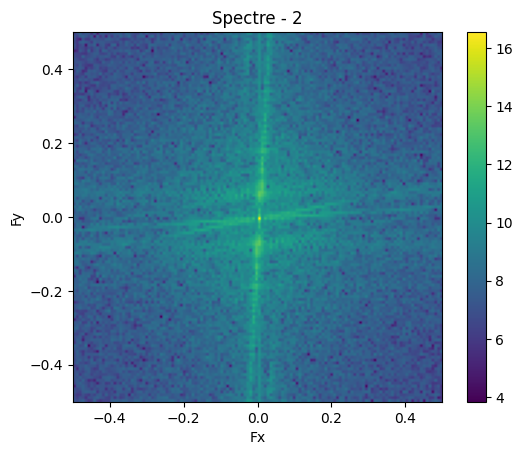

In [78]:
imgMetal = cv.imread("./imagesTP/Metal0007GP.png")
imgMetal = cv.cvtColor(imgMetal, cv.COLOR_BGR2GRAY)

affiche_image(imgMetal)

fourier2d(imgMetal, 1)

(128, 128)


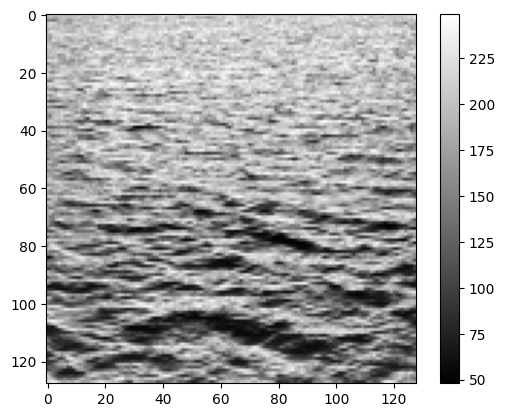

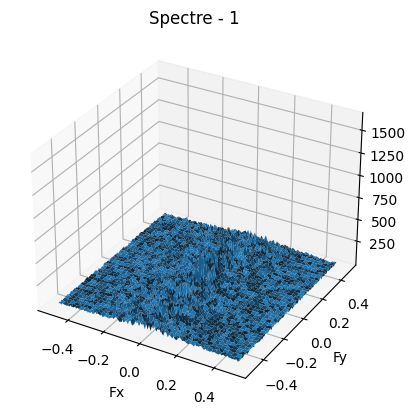

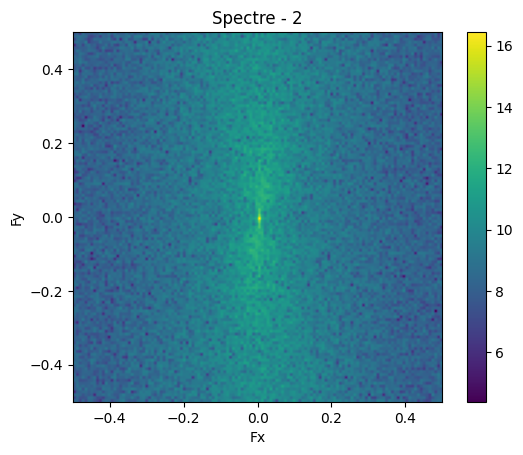

In [79]:
imgWater = cv.imread("./imagesTP/Water0000GP.png")
imgWater = cv.cvtColor(imgWater, cv.COLOR_BGR2GRAY)

affiche_image(imgWater)

fourier2d(imgWater, 1)

(128, 128)


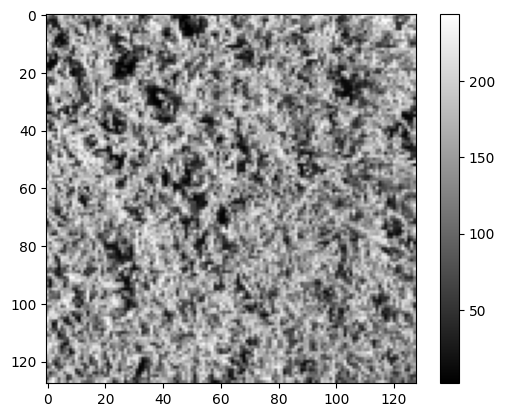

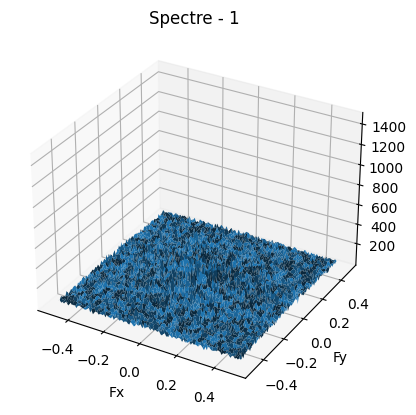

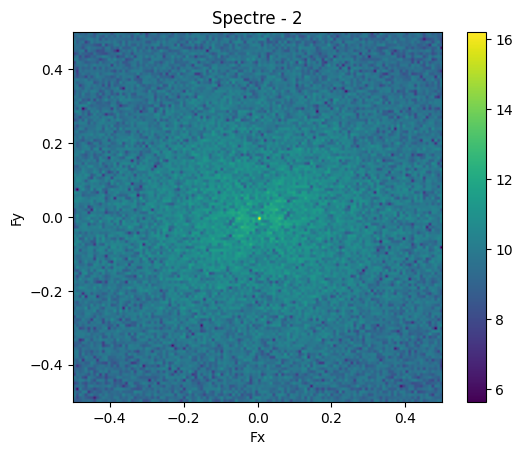

In [80]:
imgLeaves = cv.imread("./imagesTP/Leaves0012GP.png")
imgLeaves = cv.cvtColor(imgLeaves, cv.COLOR_BGR2GRAY)

affiche_image(imgLeaves)

fourier2d(imgLeaves, 1)

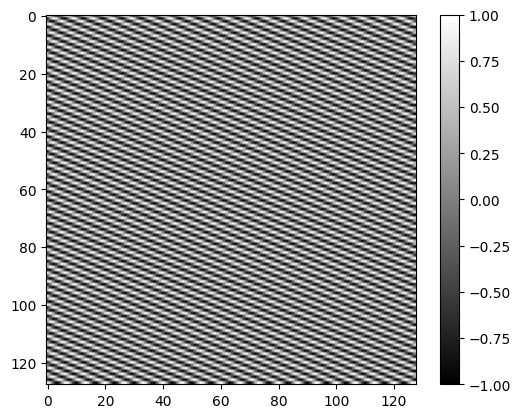

In [81]:
imgOsc = atom(128,128,0.15,0.37)
affiche_image(imgOsc)

(128, 128)


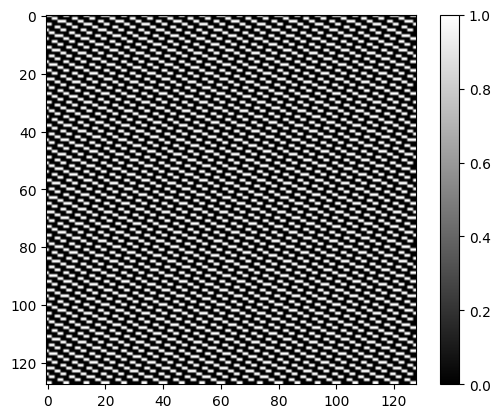

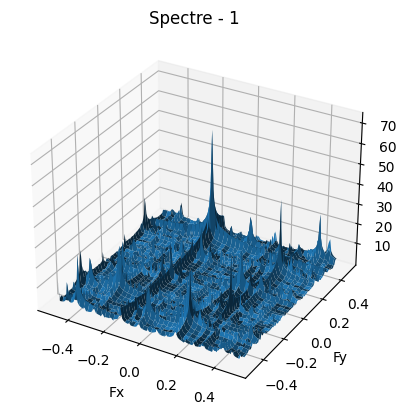

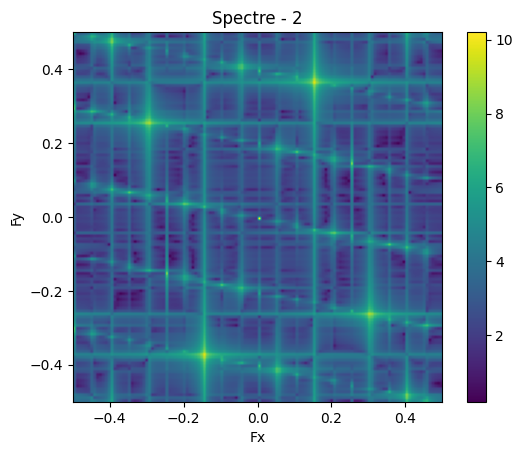

In [82]:
imgOsc = cv.threshold(imgOsc, 0.5, 1, cv.THRESH_BINARY)[1]

affiche_image(imgOsc)

fourier2d(imgOsc, 1)


(64, 64)


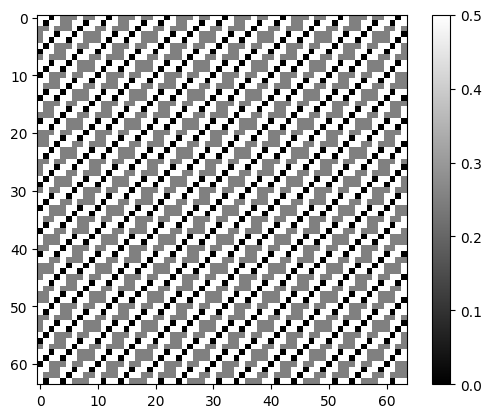

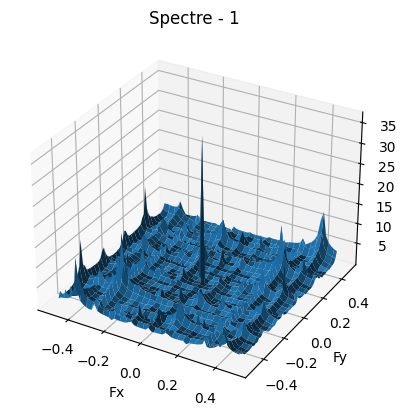

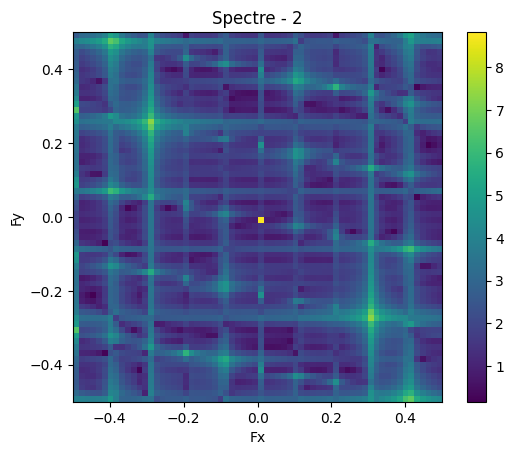

In [83]:
imgOsc2 = cv.resize(imgOsc, (64, 64))
affiche_image(imgOsc2)

fourier2d(imgOsc2, 1)